In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
car=pd.read_csv('extended_data.csv')

In [3]:
car

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,Land Cruiser Base,SUV,13.0,1,84900.0,0
1,2014,RAM,ProMaster 2500 Window Van High Roof,Van,15.0,0,35000.0,0
2,2002,Ford,Mustang GT,Coupe,16.0,0,26250.0,0
3,2012,BMW,428 Gran Coupe i xDrive,Sedan,27.0,1,45000.0,0
4,2008,Mercedes-Benz,SL-Class SL500 Roadster,Convertible,18.0,1,100000.0,1
...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Huracan LP580-2S,Coupe,21.0,1,200000.0,1
28139,2001,Mazda,RX-8 Sport,Coupe,18.0,0,25000.0,0
28140,2018,Ford,Model X P100D,SUV,94.0,1,199000.0,1
28141,2022,Land,Rover Range Rover Velar P380 SE R-Dynamic,SUV,20.0,1,63700.0,0


In [4]:
car.drop(columns=['model'],inplace=True)

In [5]:
car.isnull().sum()

model_year           0
brand                0
type                 0
miles_per_gallon    17
premium_version      0
msrp                17
collection_car       0
dtype: int64

In [6]:
car[car.duplicated()]

,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car
874,2020,Mercedes-Benz,SUV,13.0,1,157000.0,1
1521,2018,RAM,Pickup,12.0,0,35000.0,0
1871,2011,BMW,Sedan,20.0,0,35000.0,0
1884,2011,Mercedes-Benz,Van,20.0,0,35000.0,0
1965,2022,Mercedes-Benz,SUV,13.0,1,157900.0,1
...,...,...,...,...,...,...,...
28081,2020,Jeep,SUV,22.0,0,24000.0,0
28098,2000,Ford,SUV,15.0,0,35000.0,0
28099,2011,BMW,Sedan,20.0,1,100000.0,0
28102,2002,Chevrolet,Pickup,15.0,0,30000.0,0


In [7]:
car['miles_per_gallon'].fillna(value=car['miles_per_gallon'].mean(),inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_36688\245467579.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car['miles_per_gallon'].fillna(value=car['miles_per_gallon'].mean(),inplace=True)


In [8]:
car['msrp'].fillna(car['msrp'].mean(),inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_36688\1973983750.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car['msrp'].fillna(car['msrp'].mean(),inplace=True)


In [9]:
car.shape

(28143, 7)

In [10]:
car.columns

Index(['model_year', 'brand', 'type', 'miles_per_gallon', 'premium_version',
       'msrp', 'collection_car'],
      dtype='object')

In [11]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28143 entries, 0 to 28142
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model_year        28143 non-null  int64  
 1   brand             28143 non-null  object 
 2   type              28143 non-null  object 
 3   miles_per_gallon  28143 non-null  float64
 4   premium_version   28143 non-null  int64  
 5   msrp              28143 non-null  float64
 6   collection_car    28143 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.5+ MB


In [12]:
car.nunique()

model_year            36
brand                 57
type                   9
miles_per_gallon     122
premium_version        2
msrp                2951
collection_car         2
dtype: int64

In [13]:
car.drop('collection_car',axis=1,inplace=True)

In [14]:
car['type'].unique()

array(['SUV', 'Van', 'Coupe', 'Sedan', 'Convertible', 'Pickup', 'Minivan',
       'Hatchback', 'Wagon'], dtype=object)

In [15]:
cat=[]
num=[]
for i in car.columns:
    if car[i].nunique()<10:
        cat.append(i)
    else:
        num.append(i)
    

In [16]:
cat

['type', 'premium_version']

In [17]:
num

['model_year', 'brand', 'miles_per_gallon', 'msrp']

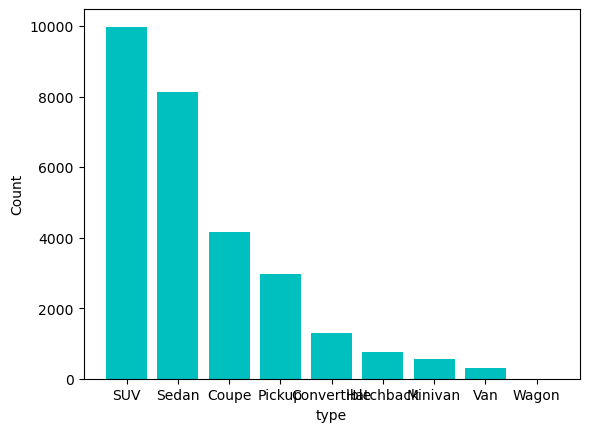

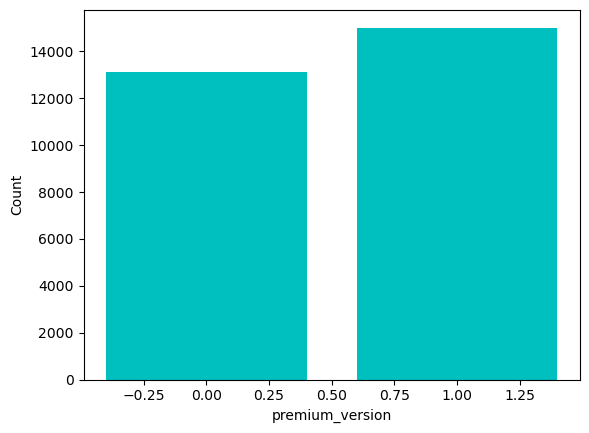

In [18]:
for i in cat:
    vc=car[i].value_counts()
    plt.bar(vc.index,height=vc,color='c')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

In [19]:
car

,model_year,brand,type,miles_per_gallon,premium_version,msrp
0,2016,Toyota,SUV,13.0,1,84900.0
1,2014,RAM,Van,15.0,0,35000.0
2,2002,Ford,Coupe,16.0,0,26250.0
3,2012,BMW,Sedan,27.0,1,45000.0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0
...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0
28139,2001,Mazda,Coupe,18.0,0,25000.0
28140,2018,Ford,SUV,94.0,1,199000.0
28141,2022,Land,SUV,20.0,1,63700.0


In [20]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
types=ohe.fit_transform(car[["type"]])
types

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [21]:
type(types)

numpy.ndarray

In [22]:
ohe.categories_

[array(['Convertible', 'Coupe', 'Hatchback', 'Minivan', 'Pickup', 'SUV',
        'Sedan', 'Van', 'Wagon'], dtype=object)]

In [23]:
type_df=pd.DataFrame(types,columns=ohe.categories_)

In [24]:
car=pd.concat([car,type_df],axis=1)

In [25]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
brands=ohe.fit_transform(car[["brand"]])
brands

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
brand_df=pd.DataFrame(brands,columns=ohe.categories_)

In [27]:
car=pd.concat([car,brand_df],axis=1)

In [28]:
car['miles_per_gallon'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
28138    False
28139    False
28140    False
28141    False
28142    False
Name: miles_per_gallon, Length: 28143, dtype: bool

In [29]:
car

,model_year,brand,type,miles_per_gallon,premium_version,msrp,"(Convertible,)","(Coupe,)","(Hatchback,)","(Minivan,)",...,"(Saab,)","(Saturn,)","(Scion,)","(Subaru,)","(Suzuki,)","(Tesla,)","(Toyota,)","(Volkswagen,)","(Volvo,)","(smart,)"
0,2016,Toyota,SUV,13.0,1,84900.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,RAM,Van,15.0,0,35000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,Ford,Coupe,16.0,0,26250.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,BMW,Sedan,27.0,1,45000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,Mazda,Coupe,18.0,0,25000.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,Ford,SUV,94.0,1,199000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,2022,Land,SUV,20.0,1,63700.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
X_df=car.drop(['brand','type','msrp'],axis=1)
y=car['msrp']

In [53]:
X_df

,model_year,miles_per_gallon,premium_version,"(Convertible,)","(Coupe,)","(Hatchback,)","(Minivan,)","(Pickup,)","(SUV,)","(Sedan,)",...,"(Saab,)","(Saturn,)","(Scion,)","(Subaru,)","(Suzuki,)","(Tesla,)","(Toyota,)","(Volkswagen,)","(Volvo,)","(smart,)"
0,2016,13.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,15.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,16.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,27.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008,18.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,21.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,18.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,94.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,2022,20.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
X_df=X_df.drop('model_year',axis=1)

In [61]:
X=X_df.values
Y=y.values

In [63]:
Y

array([ 84900.,  35000.,  26250., ..., 199000.,  63700.,  83500.])

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [67]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19700, 68)
(8443, 68)
(19700,)
(8443,)


In [69]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [71]:
y_train_pred=lr_model.predict(X_train)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [73]:
mse_t=mean_squared_error(y_train_pred,y_train)
rmse_t=mse_t**0.5
mae_t=mean_absolute_error(y_train_pred,y_train)
r2_train=r2_score(y_train,y_train_pred)
print(mse_t)
print(rmse_t)
print(mae_t)
print(r2_train)

1149723462.5474803
33907.572348186186
17353.66264375718
0.7130762024752908


In [39]:
y_test_pred=lr_model.predict(X_test)

In [75]:
mse_test=mean_squared_error(y_test_pred,y_test)
rmse_test=mse_test**0.5
mae_test=mean_absolute_error(y_test_pred,y_test)
r2_test=r2_score(y_test,y_test_pred)
print(mse_test)
print(rmse_test)
print(mae_test)
print(r2_test)

1611808468.604002
40147.33451431118
17717.575579944114
0.5015352671441647


In [81]:
#assumptions of linear regresion
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson as dw
from statsmodels.stats.diagnostic import het_breuschpagan as hb
from scipy.stats import shapiro, probplot


def test_linear_regression_assumptions(X, y, X_df):
    """Test the key assumptions of linear regression: Liniarity, Independence, Homoscedasticity, Normality of residuals and No Multicollinearity
    
    Parameters:
    x (Dataframe): Independent variables
    y (Series): Dependent variables
    
    Returns:
    None
    """
    
    #Add constant to x for intercept
    X=sm.add_constant(X)

    #fit OLS model
    ols_model =sm.OLS(y,X).fit()
    residuals =ols_model.resid
    predicted_values = ols_model.fittedvalues

    #Linearity
    print("1. Linearity:\n")
    plt.scatter(predicted_values, residuals, alpha=0.7, edgecolors='k')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs Predicted Values")
    plt.show()
    print("Check if the residuals are randomly scattered around 0. Non-random patterns indicate non-Linearity")

    # No Autocorrelation: independence of Errors
    print("1. Independence of Errors(Durbin Watson Test):\n")
    dw_stat= dw(residuals)
    print(f"Durbin Watson Statistics:{dw_stat}")
    if 1.5 <= dw_stat >= 2.5:
        print("Residual appears to be independent(No autocorrelation).\n")
    else:
        ("Residuals show autocorrelation. consider adding lag variables or using GLS.\n")

    #Homoscedasticity
    print("3. Homoscedasticity(Breusch-Pegan Test):\n")
    bp_test = hb(residuals,X)
    print(f"Lagrange Multiplier Statistics: {bp_test[0]}")
    print(f"p-value: {bp_test}")
    if bp_test[1]>0.05:
        print("Residuals have constant variance(Homoscedasticity).\n")
    else:
        print("Residuals do not have constant variiance(heteroscedasticity). consider GLS or transfromation.\n")

    #Normality of Error
    print("4. Normality of Errors\n")
    sns.histplot(residuals, kde= True, bins=20, color='blue')
    plt.title("Histogram of Residuals")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

    probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot of Residuals")
    plt.show()


    shapiro_test = shapiro(residuals)
    print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")
    if shapiro_test.pvalue > 0.05:
        print ("Residuals are normally distributed. \n")
    else:
        print ("Residuals are not normally distributed. Consider transformations or robust regression.\n")

    #Multicollinearity
    print("5. Multicollinearity (Variance Inflation Factor):\n")
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_df.columns
    vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    print (vif_data)
    if vif_data["VIF"].max() > 10:
        print("High multicollinearity detected. Consider removing or combining highly correlated variables. \n")
    else:
        print("No significant multicollinearity detected.\n")

1. Linearity:



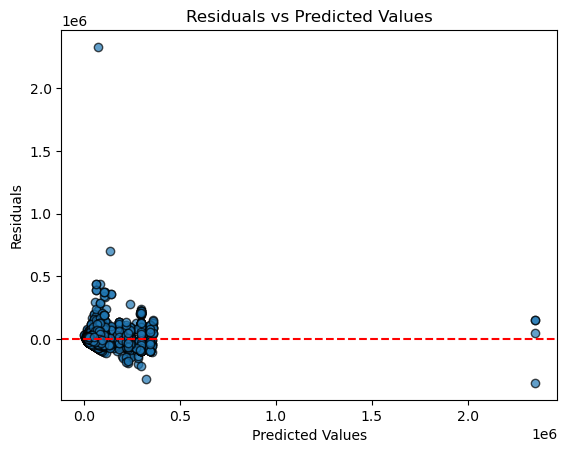

Check if the residuals are randomly scattered around 0. Non-random patterns indicate non-Linearity
1. Independence of Errors(Durbin Watson Test):

Durbin Watson Statistics:1.9873988036343446
3. Homoscedasticity(Breusch-Pegan Test):

Lagrange Multiplier Statistics: 109.19171338639214
p-value: (109.19171338639214, 0.0011343254522661619, 1.6579829386032252, 0.0006436058428129499)
Residuals do not have constant variiance(heteroscedasticity). consider GLS or transfromation.

4. Normality of Errors



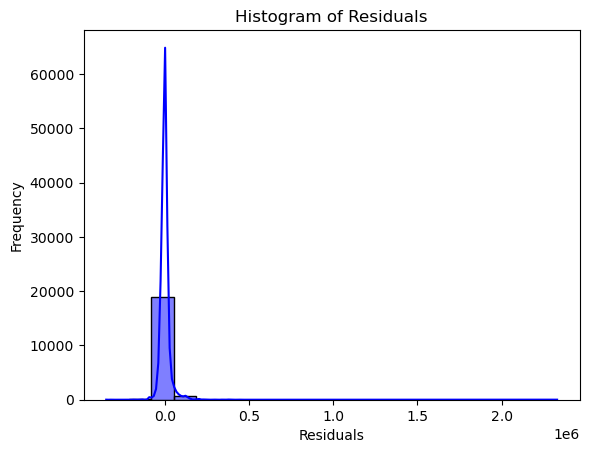

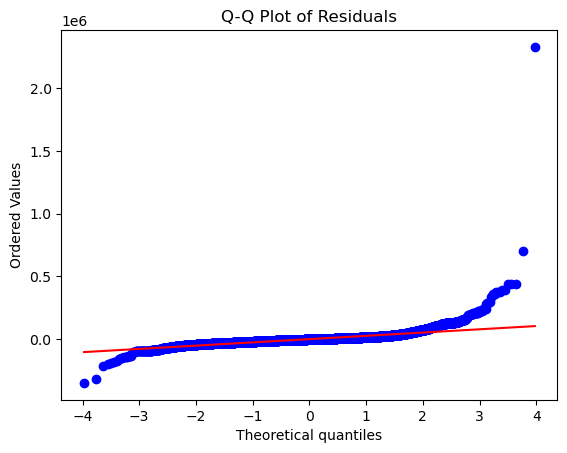

C:\Users\Sarthak\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19700.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test p-value: 1.9527774410015242e-110
Residuals are not normally distributed. Consider transformations or robust regression.

5. Multicollinearity (Variance Inflation Factor):



C:\Users\Sarthak\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


             Feature       VIF
0   miles_per_gallon  1.636245
1    premium_version  1.229068
2     (Convertible,)       inf
3           (Coupe,)       inf
4       (Hatchback,)       inf
..               ...       ...
63          (Tesla,)       inf
64         (Toyota,)       inf
65     (Volkswagen,)       inf
66          (Volvo,)       inf
67          (smart,)       inf

[68 rows x 2 columns]
High multicollinearity detected. Consider removing or combining highly correlated variables. 



In [83]:
test_linear_regression_assumptions(X_train,y_train,X_df)

## Polynomial Regression

In [86]:
from sklearn.preprocessing import PolynomialFeatures

In [90]:
poly=PolynomialFeatures(degree=2)
X_poly_train=poly.fit_transform(X_train)
X_poly_test=poly.transform(X_test)
X_train[0]
X_poly_train[0]
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_train)
y_poly_pred

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_poly_train = mean_squared_error(y_poly_pred, y_train)
rmse_poly_train = mean_squared_error(y_poly_pred , y_train) ** 0.5
mae_poly_train = mean_absolute_error(y_poly_pred, y_train)
r2_poly_train = r2_score(y_poly_pred, y_train)

print(mse_poly_train)
print(rmse_poly_train)
print(mae_poly_train)
print(r2_poly_train)

954343266.9533178
30892.446762166925
15137.970313813208
0.6873896023927367


In [96]:
y_poly_pred_test = poly_model.predict(X_poly_test)
mse_poly_test = mean_squared_error(y_poly_pred_test, y_test)
rmse_poly_test = mean_squared_error(y_poly_pred_test , y_test)**0.5
mae_poly_test = mean_absolute_error(y_poly_pred_test, y_test)
r2_poly_test = r2_score(y_poly_pred_test,y_test)

print(mse_poly_test)
print(rmse_poly_test)
print(mae_poly_test)
print(r2_poly_test)

4.1829954517618406e+20
20452372605.059395
684615021.6276034
-2.1330074236436403e-05


In [41]:
#assumptions
    #multicollinearity:independent columns should not have linear relation with another independent columns
    #linearity:every independent column must have linear relation with dependent column
    
    # residuals:
    # normality of resiudals: errors must be normally distributed
    # no autocorrelation:there is no positive or negative relation between errrors
    #homoscedasticity:error should be constant that means errors should be similar
    

## Lasso

In [99]:
#lasso
from sklearn.linear_model import Lasso,Ridge,ElasticNet

l1=Lasso(alpha=1.0)
l1.fit(X_train,y_train)
y_pred_train_l1=l1.predict(X_train)

mse_l1_train=mean_squared_error(y_pred_train_l1,y_train)
rmse_l1_train=mean_squared_error(y_pred_train_l1,y_train)**0.5
mae_l1_train=mean_absolute_error(y_train,y_pred_train_l1)
r2_l1_train=r2_score(y_train,y_pred_train_l1)
print(mse_l1_train)
print(rmse_l1_train)
print(mae_l1_train)
print(r2_l1_train)

1149774605.592431
33908.32649353889
17354.59957406789
0.7130634392699182


C:\Users\Sarthak\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.167e+11, tolerance: 7.894e+09
  model = cd_fast.enet_coordinate_descent(


In [107]:
y_pred_test_l1=l1.predict(X_test)

mse_l1_test=mean_squared_error(y_pred_test_l1,y_test)
rmse_l1_test=mean_squared_error(y_pred_test_l1,y_test)**0.5
mae_l1_test=mean_absolute_error(y_test,y_pred_test_l1)
r2_l1_test=r2_score(y_test,y_pred_test_l1)
print(mse_l1_test)
print(rmse_l1_test)
print(mae_l1_test)
print(r2_l1_test)

1611689576.8665545
40145.853794215844
17713.69088444999
0.5015720353702289


In [109]:
l2=Ridge(alpha=1.0)
l2.fit(X_train,y_train)
y_pred_train_l1=l2.predict(X_train)

mse_l1_train=mean_squared_error(y_pred_train_l1,y_train)
rmse_l1_train=mean_squared_error(y_pred_train_l1,y_train)**0.5
mae_l1_train=mean_absolute_error(y_pred_train_l1,y_train)
r2_l1_train=r2_score(y_train,y_pred_train_l1)
print(mse_l1_train)
print(rmse_l1_train)
print(mae_l1_train)
print(r2_l1_train)


1190412662.028231
34502.357340162
17468.650095132853
0.7029218479599979


In [111]:
l2=ElasticNet(alpha=1.0,l1_ratio=0.6)
l2.fit(X_train,y_train)
y_pred_train_l1=l2.predict(X_train)

mse_l1_train=mean_squared_error(y_pred_train_l1,y_train)
rmse_l1_train=mean_squared_error(y_pred_train_l1,y_train)**0.5
mae_l1_train=mean_absolute_error(y_pred_train_l1,y_train)
r2_l1_train=r2_score(y_train,y_pred_train_l1)
print(mse_l1_train)
print(rmse_l1_train)
print(mae_l1_train)
print(r2_l1_train)

3547647345.254042
59562.130126902295
27780.031768929297
0.11465279979297105


In [113]:
#knn regressor
from sklearn.neighbors import KNeighborsRegressor as knr
knn_r=knr(n_neighbors=5)
knn_r.fit(X_train,y_train)
y_train_knn=knn_r.predict(X_train)

mse_knn_train=mean_squared_error(y_train_knn,y_train)
rmse_knn_train=mean_squared_error(y_train_knn,y_train)**0.5
mae_knn_train=mean_absolute_error(y_train_knn,y_train)
r2_knn_train=r2_score(y_train,y_train_knn)
print(mse_knn_train)
print(rmse_knn_train)
print(mae_knn_train)
print(r2_knn_train)


545473715.0485164
23355.37871772831
12091.413003101707
0.8638721441546924


In [130]:
#svr
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)
y_train_svr=svr.predict(X_train)



In [132]:
mse_svr_train=mean_squared_error(y_train_svr,y_train)
rmse_svr_train=mean_squared_error(y_train_svr,y_train)**0.5
mae_svr_train=mean_absolute_error(y_train_svr,y_train)
r2_svr_train=r2_score(y_train,y_train_svr)
print(mse_svr_train)
print(rmse_svr_train)
print(mae_svr_train)
print(r2_svr_train)

4254248229.202257
65224.598344506936
28309.004315322618
-0.06168578558087101


In [121]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor 
dtree=DecisionTreeRegressor(max_depth=20,random_state=0)
dtree.fit(X_train,y_train)
y_train_dtree=dtree.predict(X_train)

mse_dtree_train=mean_squared_error(y_train_dtree,y_train)
rmse_dtree_train=mean_squared_error(y_train_dtree,y_train)**0.5
mae_dtree_train=mean_absolute_error(y_train_dtree,y_train)
r2_dtree_train=r2_score(y_train,y_train_dtree)
print(mse_dtree_train)
print(rmse_dtree_train)
print(mae_dtree_train)
print(r2_dtree_train)

486241828.71371216
22050.891789533416
12541.961271248418
0.8786539924124268


In [128]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(max_depth=20,n_estimators=100,random_state=0)
forest.fit(X_train,y_train)
y_train_forest=forest.predict(X_train)

mse_forest_train=mean_squared_error(y_train_forest,y_train)
rmse_forest_train=mean_squared_error(y_train_forest,y_train)**0.5
mae_forest_train=mean_absolute_error(y_train_forest,y_train)
r2_forest_train=r2_score(y_train,y_train_forest)
print(mse_forest_train)
print(rmse_forest_train)
print(mae_forest_train)
print(r2_forest_train)

538568630.2553366
23207.081467848056
12494.297969655996
0.8655953699699674


In [ ]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(max_depth=20,n_estimators=100,random_state=0)
forest.fit(X_train,y_train)
y_train_forest=forest.predict(X_train)

mse_forest_train=mean_squared_error(y_train_forest,y_train)
rmse_forest_train=mean_squared_error(y_train_forest,y_train)**0.5
mae_forest_train=mean_absolute_error(y_train_forest,y_train)
r2_forest_train=r2_score(y_train,y_train_forest)
print(mse_forest_train)
print(rmse_forest_train)
print(mae_forest_train)
print(r2_forest_train)

In [42]:
for i in X.columns:
    plt.scatter(X[i],y)
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.title(i)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [25]:
11**2
import math

In [27]:
math.sqrt((5-9)**2 + (1-1.4)**2)

4.019950248448356

In [7]:
math.sqrt((7-9)**2 + (1.4-1.4)**2)

4.0

In [9]:
(12-9)**2 + (1.6-1.4)**2

9.040000000000001

In [11]:
(6-9)**2 + (0.8-1.4)**2

9.36

In [13]:
(8-9)**2 + (1-1.4)**2

1.16

In [15]:
(15-9)**2 + (1.7-1.4)**2

36.09

In [17]:
(10-9)**2 + (1.3-1.4)**2

1.01

In [19]:
(11-9)**2 + (1.2-1.4)**2

4.04

In [21]:
(10-9)**2 + (1.4-1.4)**2

1.0

In [23]:
(8-9)**2 + (1.3-1.4)**2

1.01

![image.png](attachment:814bb1b2-9626-4630-9fb8-fe34ca3cf253.png)

## KNN Algorithm
